# Taller Ciencia de Datos 

### ***Tarea Laboratorio 2019***

![DevIt](logo.jpg)

---
<div class="text-center"> Andrea Correa </div>
<div class="text-center">Maria Laura Gayo </div>
<div class="text-center"> Mariano Koci </div>
<div class="text-center">Alejandro Wohlwend </div>
<div class="text-center">Renzo Daset </div>
<div class="text-center">Laura Rodriguez </div>

---


<a id='Indice'></a>
### Índice

1. [Objetivo](#Objetivo)

2. [Metodología](#Metodología)

3. [Realidad Planteada](#Realidad)

4. [Requerimientos Planteados](#Realidad)

5. [Adquisición de datos](#Adquisicion-Datos)
    5. [Dependencias](#Dependencias)
    5. [Import de CSV](#Import-CSV)
    5. [Unión de archivos](#Union)
    5. [Import de xml](#Import-XML)
    5. [Unificación de datos](#Unificacion)
    
6. [Transformación de los datos](#Transformacion)
    6. [Transformación de Adjudicaciones](#Transformación-Adjudicaciones)
    6. [Transformación de Monedas](#Transformación-Moneda)
    6. [Identificación de valores inválidos](#Transformación-Invalidos)
    
7. [Análisis y visualización para los requerimientos de negocio](#Visualización)
    7. TOP 20 de las organizaciones que gastaron más dinero (ordenados de forma descendente).
    7. TOP 50 de las compras más caras.
    7. Agregación de monto total por tipo de producto.
    7. TOP 10 de las unidades ejecutoras que más compraron en el periodo.
    7. Compras directas mayores $436.000
    
8. [Conclusiones](#Conclusiones)

---

## Objetivo

Esta tarea pretende la puesta en práctica y profundización por parte el estudiante de los
siguientes puntos vistos en el taller:
- Entender cómo se implementa una ingesta de datos
- Poner en práctica técnicas para el análisis de la calidad de un conjunto de datos
- Practicar con herramientas de visualización de datos
- Aplicar la metodología de trabajo vista en el taller

## Metodología
[Inicio ▲](#Indice)

Vamos a utilizar la metodología **_CRISP-DM_**, pasando por las etapas que se detallan a continuación:
1.	Business understanding
2.	Data understanding (adquisición de datos o ingesta de datos)
3.	Data preparation

## Realidad planteada
[Inicio ▲](#Indice)

De cara a un año electoral muy reñido, de acuerdo a todos los pronósticos, el prestigioso
diario “ El Durazno Post ” se propuso acercar a sus lectores un informe especial sobre las
compras realizadas por el estado en el último período de gobierno. Como el diario no cuenta
con científicos de datos, le ha encomendado a usted y su equipo la tarea de realizar un
estudio inicial sobre dichos datos para validar la viabilidad del informe periodístico.
Los datos a analizar, provienen del sitio de Compras Estatales[1], el cual pone a disposición
varios conjuntos de datos sobre las compras realizadas por el estado, a través del Catálogo
de Datos Abiertos del Estado [2]. En particular, de todos los datos que publica esta agencia,
en esta etapa solamente interesa analizar el conjunto de datos de Adjudicaciones 2018 [2],
el cual contiene todas las adjudicaciones de compras realizadas por el estado en dicho año.
El conjunto de datos es un archivo de tipo .csv y utiliza codigueras para los valores de
algunas de los campos. Para interpretar correctamente la información de estos códigos, se
cuenta con la información de todas las codigeras utilizadas, en archivos de tipo .xml [4].

<a id='Analisis'></a>
## Requerimientos planteados

[Inicio ▲](#Indice)

---
*Se quiere obtener la siguiente información a partir de los datos*
&nbsp;

1. TOP 20 de las organizaciones que gastaron más dinero (ordenados de forma descendente).
2. TOP 50 de las compras más caras.
3. Agregación de monto total por tipo de producto
4. TOP 10 de las unidades ejecutoras que más compraron en el periodo
5. Compras directas mayores $436.000.


<a id='Adquisicion-Datos'></a>
## Adquisición de los Datos
[Inicio ▲](#Indice)


En esta etapa vamos a realizar la carga de los datos desde las fuentes brindadas (archivos .csv).

En un primer análisis podremos ver que información es necesaria para el cumplimiento de los requerimientos planteados.


Nuestra fuente para obtener los datos para analizar son fuentes de datos abiertos correspondientes al catálogo de datos abiertos del Estado, puntualmente los conjuntos de datos de Adjudicaciones 2018 que contiene las compras realizadas por el Estado en dicho año.
Partimos de la carga de tres archivos con formato .csv, dos de ellos corresponden a las compras realizadas por semestre del año y el otro contiene los metadatos para poder inferir información. Además realizamos la carga de archivos de extensión .xml que cuentan con la información de todas las codigueras utilizadas en los archivos .csv para su mejor interpretación.

Hicimos uso de distintas librerías que provee R como **_downloader y dyplr_** para poder acceder a los archivos en los formatos especificados y manerajarlos en el entorno.

## Dependencias
[Inicio ▲](#Indice)

In [1]:
#Importamos librerías necesarias
install.packages("dplyr")
install.packages("XML")
install.packages("tidyverse")
install.packages("RCurl")
install.packages("DataExplorer")
install.packages("tm")
install.packages("RColorBrewer")

library(rvest)
library(xml2)
library(XML)
library(RCurl)
library(methods)
library(dplyr)
library(ggplot2)
library(DataExplorer)
library(tidyverse)
library(tm)
library(RColorBrewer)

#library(wordcloud)
#library(SnowballC)
#library(downloader)
#library(Hmisc)

Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'XML' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Installing package into 'C:/Users/arual/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpCk2EOJ\downloaded_packages


Loading required package: xml2

Attaching package: 'XML'

The following object is masked from 'package:rvest':

    xml

Loading required package: bitops

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::complete()       masks RCurl::complete()
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()
x purrr::pluck()          masks rvest::pluck()
x XML::xml()              masks rvest::xml()
Loading required package: NLP

Attaching package: 'NLP'

The following object is masked

## Adquisición de Datos
[Inicio ▲](#Indice)

### Import .csv

Se realiza la carga de datos de las compras estatales para el primer período 2018.

In [2]:
# Carga archivo .csv 
fileGastosP1 <- "compras2018_1ero.csv"

# Cargo los datos del archivo
datosGastosP1 <- read.csv(fileGastosP1,fileEncoding = "UTF-8")

# Ver estructura de archivo, muestra los primeros 5
str(datosGastosP1)
head(datosGastosP1,5)

'data.frame':	27827 obs. of  22 variables:
 $ anio_compra          : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ apel                 : Factor w/ 3 levels "","N","S": 2 3 3 2 3 3 2 2 3 3 ...
 $ arch_adj             : Factor w/ 4525 levels "","acta_272196.PDF",..: 107 116 101 144 1 159 1 172 1 1 ...
 $ arch_reiteracion     : Factor w/ 97 levels "","reiter_600057.pdf",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ es_reiteracion       : Factor w/ 2 levels "N","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ estado_compra        : int  7 7 7 7 7 7 7 7 7 7 ...
 $ fecha_compra         : Factor w/ 366 levels "01/01/2018","01/02/2017",..: 254 142 226 311 332 311 332 179 86 153 ...
 $ fecha_pub_adj        : Factor w/ 13107 levels "01/02/2018 06:55",..: 915 892 353 1674 900 906 1244 863 313 361 ...
 $ fondos_rotatorios    : Factor w/ 2 levels "N","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ id_compra            : int  620613 620880 620374 621095 621195 621246 621344 621496 621843 622084 ...
 $ id_inciso            : int  

anio_compra,apel,arch_adj,arch_reiteracion,es_reiteracion,estado_compra,fecha_compra,fecha_pub_adj,fondos_rotatorios,id_compra,...,id_tipo_resol,id_tipocompra,id_ue,monto_adj,nro_ampliacion,num_compra,num_resol,objeto,subtipo_compra,open_contracting_link
2017,N,acta_620613.pdf,,N,7,21/12/2017,03/01/2018 16:25,N,620613,...,1,LA,31,17910.00,0,12,1217,Adquisición de 1 camioneta para el Departamento de Ciencias Sociales del CENUR Litoral Norte - Sede Salto,COM,https://comprasestatales.gub.uy/ocds/record/620613
2017,S,acta_620880.doc,,N,7,12/12/2017,03/01/2018 12:45,N,620880,...,1,CD,103,12195.03,0,295,2952017,ADQUISICIÓN DE ARTÍCULOS DE SANITARIA. Importante leer el pliego de a compra para cotizar de forma correcta. Solo se aceptan cotizaciones en línea.,COM,https://comprasestatales.gub.uy/ocds/record/620880
2017,S,acta_620374.pdf,,N,7,19/12/2017,02/01/2018 15:00,N,620374,...,1,CD,16,12468.40,0,22,1,"Compra Directa de Cartuchos para Artes Gráficas, Cotizar en función del pliego ingresado. Las ofertas se reciben solo por la página de Compras Estatales.",COM,https://comprasestatales.gub.uy/ocds/record/620374
2017,N,acta_621095.docx,,N,7,26/12/2017,05/01/2018 10:30,N,621095,...,3,CP,1,0.00,0,5066,15,Contratación de empresa para colocación de relleno en wetland del Liceo de Empalme Olmos - Ver pliego y planos adjuntos - No se aceptan ofertas en línea,COM,https://comprasestatales.gub.uy/ocds/record/621095
2017,S,,,N,7,28/12/2017,03/01/2018 14:15,N,621195,...,1,CD,103,13908.00,0,33550,0,"1 Agitador lineal, con capacidad máxima de carga de 7kgs, temporizador y regulador de velocidad, 220volt Leer adjunto.-",COM,https://comprasestatales.gub.uy/ocds/record/621195


Se realiza la carga de datos de las compras estatales para el segundo período 2018.

In [3]:
# Carga archivo .csv 
fileGastosP2 <- "compras2018_2do.csv"

# Cargo los datos del archivo
datosGastosP2 <- read.csv(fileGastosP2,fileEncoding = "UTF-8")

# Ver estructura de archivo, muestra los primeros 5
str(datosGastosP2)
head(datosGastosP2,5)

'data.frame':	27546 obs. of  22 variables:
 $ anio_compra          : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ apel                 : Factor w/ 3 levels "","N","S": 2 2 3 1 1 1 2 3 1 1 ...
 $ arch_adj             : Factor w/ 5615 levels "","acta_537895.PDF",..: 214 216 187 1 1 1 1 1 1 1 ...
 $ arch_reiteracion     : Factor w/ 96 levels "","reiter_604908.pdf",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ es_reiteracion       : Factor w/ 2 levels "N","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ estado_compra        : int  7 7 7 7 7 7 7 7 7 7 ...
 $ fecha_compra         : Factor w/ 312 levels "01/01/2018","01/02/2018",..: 257 257 255 6 98 202 8 232 246 146 ...
 $ fecha_pub_adj        : Factor w/ 11570 levels "01/08/2018 07:25",..: 11259 11260 24 9433 9434 9434 1 9409 9435 9436 ...
 $ fondos_rotatorios    : Factor w/ 2 levels "N","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ id_compra            : int  637079 637085 636213 664776 664773 661416 664781 654062 664783 664790 ...
 $ id_inciso            : int  29 29

anio_compra,apel,arch_adj,arch_reiteracion,es_reiteracion,estado_compra,fecha_compra,fecha_pub_adj,fondos_rotatorios,id_compra,...,id_tipo_resol,id_tipocompra,id_ue,monto_adj,nro_ampliacion,num_compra,num_resol,objeto,subtipo_compra,open_contracting_link
2018,N,acta_637079.pdf,,N,7,26/07/2018,31/07/2018 14:35,N,637079,...,4,LA,30,0.00,0,2,30,SERVICIO DE CAMILLEROS,COM,https://comprasestatales.gub.uy/ocds/record/637079
2018,N,acta_637085.pdf,,N,7,26/07/2018,31/07/2018 14:40,N,637085,...,4,LA,30,0.00,0,4,27,SERVICIO DE LAVADO Y PLANCHADO,COM,https://comprasestatales.gub.uy/ocds/record/637085
2018,S,acta_636213.pdf,,N,7,26/04/2018,01/08/2018 10:20,N,636213,...,1,LA,76,1010160.00,0,10,3122018,MANTENIMIENTO DE LAS REDES DE GASES MEDICINALES,COM,https://comprasestatales.gub.uy/ocds/record/636213
2018,,,,N,7,01/06/2018,27/07/2018 11:20,N,664776,...,1,CD,5,28274.72,0,5018,5018,DGSG. RECARGAS DE GARRAFA A SUPERGAS - AÑO:2018,COM,https://comprasestatales.gub.uy/ocds/record/664776
2018,,,,N,7,10/05/2018,27/07/2018 11:25,N,664773,...,1,CD,1,983.81,0,282,0,Frascos de cola adhesiva.,COM,https://comprasestatales.gub.uy/ocds/record/664773


In [4]:
#Comprobación de compatibilidad entre datasets
names(datosGastosP1)
names(datosGastosP2)

[1] "anio_compra"           "apel"                  "arch_adj"             
 [4] "arch_reiteracion"      "es_reiteracion"        "estado_compra"        
 [7] "fecha_compra"          "fecha_pub_adj"         "fondos_rotatorios"    
[10] "id_compra"             "id_inciso"             "id_moneda_monto_adj"  
[13] "id_tipo_resol"         "id_tipocompra"         "id_ue"                
[16] "monto_adj"             "nro_ampliacion"        "num_compra"           
[19] "num_resol"             "objeto"                "subtipo_compra"       
[22] "open_contracting_link"

[1] "anio_compra"           "apel"                  "arch_adj"             
 [4] "arch_reiteracion"      "es_reiteracion"        "estado_compra"        
 [7] "fecha_compra"          "fecha_pub_adj"         "fondos_rotatorios"    
[10] "id_compra"             "id_inciso"             "id_moneda_monto_adj"  
[13] "id_tipo_resol"         "id_tipocompra"         "id_ue"                
[16] "monto_adj"             "nro_ampliacion"        "num_compra"           
[19] "num_resol"             "objeto"                "subtipo_compra"       
[22] "open_contracting_link"

## Unión de Archivos
[Inicio ▲](#Indice)

### Unificación de datasets en un solo dataframe

In [5]:
comprasEstatales <- rbind(datosGastosP1, datosGastosP2)

# Ver estructura de archivo, muestra los primeros 5
str(comprasEstatales)
names(comprasEstatales)

'data.frame':	55373 obs. of  22 variables:
 $ anio_compra          : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ apel                 : Factor w/ 3 levels "","N","S": 2 3 3 2 3 3 2 2 3 3 ...
 $ arch_adj             : Factor w/ 10139 levels "","acta_272196.PDF",..: 107 116 101 144 1 159 1 172 1 1 ...
 $ arch_reiteracion     : Factor w/ 192 levels "","reiter_600057.pdf",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ es_reiteracion       : Factor w/ 2 levels "N","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ estado_compra        : int  7 7 7 7 7 7 7 7 7 7 ...
 $ fecha_compra         : Factor w/ 538 levels "01/01/2018","01/02/2017",..: 254 142 226 311 332 311 332 179 86 153 ...
 $ fecha_pub_adj        : Factor w/ 24677 levels "01/02/2018 06:55",..: 915 892 353 1674 900 906 1244 863 313 361 ...
 $ fondos_rotatorios    : Factor w/ 2 levels "N","S": 1 1 1 1 1 1 1 1 1 1 ...
 $ id_compra            : int  620613 620880 620374 621095 621195 621246 621344 621496 621843 622084 ...
 $ id_inciso            : int

[1] "anio_compra"           "apel"                  "arch_adj"             
 [4] "arch_reiteracion"      "es_reiteracion"        "estado_compra"        
 [7] "fecha_compra"          "fecha_pub_adj"         "fondos_rotatorios"    
[10] "id_compra"             "id_inciso"             "id_moneda_monto_adj"  
[13] "id_tipo_resol"         "id_tipocompra"         "id_ue"                
[16] "monto_adj"             "nro_ampliacion"        "num_compra"           
[19] "num_resol"             "objeto"                "subtipo_compra"       
[22] "open_contracting_link"

El data frame **_comprasEstatales_** contiene **_55373_** observaciones, ordenados **_22_** variables. Dichos registros corresponden a la suma de observaciones de ambos datasets.

## Import de archivos .xml
[Inicio ▲](#Indice)

### Carga Descripción de Incisos

In [6]:
#Carga de codiguera con la descripcion de Incisos
datosIncisos <- "reporteIncisos.do.xml"
doc <- xmlParse(datosIncisos)

df_incisos <- as.data.frame(t(xmlSApply(doc["/incisos/inciso"],xmlAttrs)),stringsAsFactors=FALSE)

for (col in colnames(df_incisos)){
  Encoding(df_incisos[[col]]) <- "UTF-8"}

str(df_incisos)
df_incisos

'data.frame':	64 obs. of  2 variables:
 $ id-inciso : chr  "1" "2" "3" "4" ...
 $ nom-inciso: chr  "Poder Legislativo" "Presidencia de la República" "Ministerio de Defensa Nacional" "Ministerio del Interior" ...


id-inciso,nom-inciso
1,Poder Legislativo
2,Presidencia de la República
3,Ministerio de Defensa Nacional
4,Ministerio del Interior
5,Ministerio de Economía y Finanzas
6,Ministerio de Relaciones Exteriores
7,"Ministerio de Ganadería, Agricultura y Pesca"
8,"Ministerio de Industria, Energía y Minería"
9,Ministerio de Turismo
10,Ministerio de Transporte y Obras Públicas


### Carga Descripción de Monedas

In [7]:
#Carga de codiguera con la descripcion de Monedas
datosMonedas <- "reporteMonedas.do.xml"
doc <- xmlParse(datosMonedas)

df_monedas <- as.data.frame(t(xmlSApply(doc["/monedas/moneda"],xmlAttrs)),stringsAsFactors=FALSE)

for (col in colnames(df_monedas)){
  Encoding(df_monedas[[col]]) <- "UTF-8"}

str(df_monedas)
df_monedas

'data.frame':	53 obs. of  4 variables:
 $ id-moneda          : chr  "0" "1" "2" "3" ...
 $ desc-moneda        : chr  "PESOS URUGUAYOS" "DOLAR PIZARRA VENDEDOR" "DOLAR INTERBANCARIO VENDEDOR" "FRANCO FRANCES" ...
 $ sigla-moneda       : chr  "$" "U$S" "U$S" "FF" ...
 $ id-moneda-arbitraje: chr  "0" "1" "1" "2" ...


id-moneda,desc-moneda,sigla-moneda,id-moneda-arbitraje
0,PESOS URUGUAYOS,$,0
1,DOLAR PIZARRA VENDEDOR,U$S,1
2,DOLAR INTERBANCARIO VENDEDOR,U$S,1
3,FRANCO FRANCES,FF,2
4,UNIDAD INDEXADA,UNIDAD INDEXADA,0
5,UNIDAD REAJUSTABLE,UR,0
6,MARCO ALEMAN,DM,2
7,FRANCO BELGA,FB,2
8,DOLAR CANADIENSE,DC,2
9,PESETAS,PTS,2


### Carga Descripción de Objetos de Gasto

In [8]:
#Carga de codiguera con la descripcion de los objetos de gasto
datosObjGasto <- "reporteObjetosGasto.do.xml"
doc <- xmlParse(datosObjGasto)

df_objGasto <- as.data.frame(t(xmlSApply(doc["/objetos-gasto/objeto-gasto"],xmlAttrs)),stringsAsFactors=FALSE)

for (col in colnames(df_objGasto)){
  Encoding(df_objGasto[[col]]) <- "UTF-8"}

str(df_objGasto)
df_objGasto

'data.frame':	179 obs. of  2 variables:
 $ odg        : chr  "111000" "112000" "113000" "114000" ...
 $ descripcion: chr  "ALIMENTOS PARA PERSONAS" "ALIMENTOS PARA ANIMALES" "PRODUCTOS PECUARIOS" "PRODUCTOS AGROFORESTALES Y SUS MANUFACTURAS" ...


odg,descripcion
111000,ALIMENTOS PARA PERSONAS
112000,ALIMENTOS PARA ANIMALES
113000,PRODUCTOS PECUARIOS
114000,PRODUCTOS AGROFORESTALES Y SUS MANUFACTURAS
115000,MATERIA PRIMA AGROPECUARIA Y FORESTAL
116000,MATERIAS PRIMAS DE ORIGEN ACUÁTICO
119000,OTROS PROD ALIMENTICIOS AGROPECUARIOS Y FORESTALES
121000,HILADOS Y TELAS
122000,PRENDAS DE VESTIR
123000,CONFECCIONES TEXTILES


### Carga Descripción de Sub Tipos de Compra

In [9]:
# Para la carga de ciertas codigueras es necesario utilizar la siguiente función
# Parse XML To DataFrame starting from xmlDoc and the node type of the target
xml2DataFrame <- function(xmldoc, nodeType) {
    # Fetch rootNode
    rootNode <- xmlRoot(xmldoc)

    # Get all nodes of specified type
    targetNodes <- xmlElementsByTagName(rootNode, nodeType, recursive = FALSE)
    
    # Examine first row in targetNodes to build dataFrame
    sample <- first(targetNodes)
    attrs = xmlAttrs(sample)
    dfLength <- length(names(attrs))
    dfColNames <- names(attrs)
    
    # Create dataFrame from sample attrs names as columnNames
    df <- data.frame(matrix(ncol = dfLength, nrow = 0))
    colnames(df) <-dfColNames

    # For each targetNode extract attributes and create new row in dataframe
    for (node in targetNodes)
    {
        attrs <- xmlAttrs(node)
        df[nrow(df) + 1,] = attrs[1:dfLength] # %>% select(1:dfLength)
    }
    
    return(df)
}

In [10]:
#Carga de codiguera con la descripcion de los sub tipos de compra
datosSubTipos <- "reporteSubTiposCompra.do.xml"
doc <- xmlParse(datosSubTipos)

nodeName <- "subtipo-compra"

df_subtiposCompra <- xml2DataFrame(doc, nodeName)

for (col in colnames(df_subtiposCompra)){
  Encoding(df_subtiposCompra[[col]]) <- "UTF-8"}

str(df_subtiposCompra)
df_subtiposCompra

'data.frame':	138 obs. of  8 variables:
 $ id                  : chr  "18980" "2-1" "33" "33-1" ...
 $ id-tipocompra       : chr  "CE" "PE" "CE" "CE" ...
 $ resumen             : chr  "Ley 18.980: Régimen de excepción para la ANP" "Art.2, R.794/007 - UTE: Contratación Parque de Vacaciones" "Art. 33: Para adquirir bienes o contratar servicios por parte de la Un. Oper. Central del Plan Juntos" "Art. 33, 1: Contratación entre organismos o dependencias del Estado" ...
 $ cond-precios-ofertas: chr  "x>=0" "N" "x>=0" "N" ...
 $ fecha-baja          : chr  "" "x>=0" "31/05/2012 00:00" "x>=0" ...
 $ prov-rupe           : chr  "S" "" "S" "" ...
 $ pub-adj             : chr  "S" "S" "S" "N" ...
 $ cant-adj            : chr  "S" "S" "S" "S" ...


id,id-tipocompra,resumen,cond-precios-ofertas,fecha-baja,prov-rupe,pub-adj,cant-adj
18980,CE,Ley 18.980: Régimen de excepción para la ANP,x>=0,,S,S,S
2-1,PE,"Art.2, R.794/007 - UTE: Contratación Parque de Vacaciones",N,x>=0,,S,S
33,CE,Art. 33: Para adquirir bienes o contratar servicios por parte de la Un. Oper. Central del Plan Juntos,x>=0,31/05/2012 00:00,S,S,S
33-1,CE,"Art. 33, 1: Contratación entre organismos o dependencias del Estado",N,x>=0,,N,S
33-10,CE,"Art. 33, 10: Notoria escasez de los bienes o servicios a contratar",N,x>=0,,S,S
33-11,CE,"Art. 33, 11: Adquisición de bienes en remates públicos",N,x>=0,,N,S
33-12,CE,"Art. 33, 12: Compra de semovientes por selección",N,x>=0,,S,S
33-13,CE,"Art. 33, 13: Fomento económico o satisfacción de necesidades sanitarias",N,x>=0,,S,S
33-14,CE,"Art. 33, 14: Material docente o bibliográfico del exterior",N,x>=0,,S,S
33-15,CE,"Art. 33, 15: Adquisición de víveres frescos directamente a productores",x>=0,,S,S,S


### Carga Descripción de Tipos de Compra

In [11]:
#Carga de codiguera con la descripcion de los tipos de compra
datosTipos <- "reporteTiposCompra.do.xml"
doc <- xmlParse(datosTipos)

nodeName <- "tipo-compra"

df_tiposCompra <- xml2DataFrame(doc, nodeName)

for (col in colnames(df_tiposCompra)){
  Encoding(df_tiposCompra[[col]]) <- "UTF-8"}

str(df_tiposCompra)
df_tiposCompra

'data.frame':	20 obs. of  9 variables:
 $ id                    : chr  "CD" "CE" "CM" "CO" ...
 $ descripcion           : chr  "Compra Directa" "Compra por Excepción" "Convenio Marco" "Concesión" ...
 $ oferta-economica      : chr  "S" "S" "S" "S" ...
 $ acto-apertura         : chr  "N" "48" "S" "S" ...
 $ resolucion-obligatoria: chr  "N" "S" "120" "48" ...
 $ solics-llamado        : chr  "N" "S" "S" "S" ...
 $ ampliaciones          : chr  "S" "N" "S" "S" ...
 $ tope-legal            : chr  "S" "N" "N" "S" ...
 $ pcpd                  : chr  "N" NA "N" "N" ...


id,descripcion,oferta-economica,acto-apertura,resolucion-obligatoria,solics-llamado,ampliaciones,tope-legal,pcpd
CD,Compra Directa,S,N,N,N,S,S,N
CE,Compra por Excepción,S,48,S,S,N,N,NA
CM,Convenio Marco,S,S,120,S,S,N,N
CO,Concesión,S,S,48,S,S,S,N
CP,PFI - Comparación de precios,N,N,N,N,S,N,N
DI,PFI - Contratación directa,N,N,N,N,S,N,N
EI,Llamado a Expresiones de Interés,N,N,48,N,S,N,N
LA,Licitación Abreviada,S,S,48,S,S,S,S
LI,PFI - Licitación pública internacional,S,S,S,S,S,N,N
LL,PFI - Licitación internacional limitada,S,S,S,S,S,N,N


### Carga Descripción de Unidades Ejecutoras

In [12]:
#Carga de codiguera con la descripcion de las Unidades Ejecutoras
datosUnidadesEjecutoras <- "reporteUnidadesEjecutoras.do.xml"
doc <- xmlParse(datosUnidadesEjecutoras)

df_unidadesEjecutoras <- as.data.frame(t(xmlSApply(doc["/unidades-ejecutoras/unidad-ejecutora"],xmlAttrs)),stringsAsFactors=FALSE)

for (col in colnames(df_unidadesEjecutoras)){
  Encoding(df_unidadesEjecutoras[[col]]) <- "UTF-8"}

str(df_unidadesEjecutoras)
df_unidadesEjecutoras

'data.frame':	427 obs. of  3 variables:
 $ id-inciso: chr  "1" "1" "1" "2" ...
 $ id-ue    : chr  "1" "2" "3" "1" ...
 $ nom-ue   : chr  "Cámara de Senadores" "Cámara de Representantes" "Comisión Administrativa del Poder Legislativo" "Presidencia  de la República y Oficinas Dependientes" ...


id-inciso,id-ue,nom-ue
1,1,Cámara de Senadores
1,2,Cámara de Representantes
1,3,Comisión Administrativa del Poder Legislativo
2,1,Presidencia de la República y Oficinas Dependientes
2,3,Casa Militar
2,4,Oficina de Planeamiento y Presupuesto
2,5,NO VIGENTE - Dirección de Proyectos de Desarrollo
2,6,Unidad Reguladora de Serv. de Energía y Agua-URSEA
2,7,Instituto Nacional de Estadística
2,8,Oficina Nacional del Servicio Civil


## Unificación de Datos
[Inicio ▲](#Indice)

#### Agregar alguna cosa <<<<<

In [13]:
# Seleccionamos las variables a mantener del data frame "comprasEstatales" necesarias para el análisis
comprasEstatales <- select(comprasEstatales, anio_compra, id_inciso, id_moneda_monto_adj, id_tipocompra, id_ue, monto_adj, subtipo_compra)

# Ver estructura
str(comprasEstatales)
names(comprasEstatales)

'data.frame':	55373 obs. of  7 variables:
 $ anio_compra        : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ id_inciso          : int  26 29 26 25 12 26 3 85 12 9 ...
 $ id_moneda_monto_adj: int  1 0 0 0 0 0 0 0 0 0 ...
 $ id_tipocompra      : Factor w/ 15 levels "CD","CE","CO",..: 7 1 1 4 1 7 1 7 1 1 ...
 $ id_ue              : int  31 103 16 1 103 16 1 1 103 1 ...
 $ monto_adj          : num  17910 12195 12468 0 13908 ...
 $ subtipo_compra     : Factor w/ 37 levels "33-1","33-10",..: 30 30 30 30 30 30 30 30 30 30 ...


[1] "anio_compra"         "id_inciso"           "id_moneda_monto_adj"
[4] "id_tipocompra"       "id_ue"               "monto_adj"          
[7] "subtipo_compra"

#### Join con codigueras

In [14]:
# Join codiguera datosIncisos (df_incisos) con el data frame comprasEstatales
comprasEstatales <- merge(x=comprasEstatales, y=df_incisos, by.x="id_inciso", by.y="id-inciso",all.x=TRUE)

# Ver estructura
str(comprasEstatales)

'data.frame':	55373 obs. of  8 variables:
 $ id_inciso          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ anio_compra        : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ id_moneda_monto_adj: int  1 0 0 0 0 0 0 0 0 0 ...
 $ id_tipocompra      : Factor w/ 15 levels "CD","CE","CO",..: 7 1 1 1 1 1 1 1 1 1 ...
 $ id_ue              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ monto_adj          : num  62486 1830 1960 5824 4819 ...
 $ subtipo_compra     : Factor w/ 37 levels "33-1","33-10",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ nom-inciso         : chr  "Poder Legislativo" "Poder Legislativo" "Poder Legislativo" "Poder Legislativo" ...


In [15]:
# Join codiguera datosMonedas (df_monedas) con el data frame comprasEstatales
# Seleccionamos columnas del data frame que interesan para realizar el join
df_columnas_monedas <- select(df_monedas, 1:2)
comprasEstatales <- merge(x=comprasEstatales, y=df_columnas_monedas, by.x="id_moneda_monto_adj", by.y="id-moneda",all.x=TRUE)

# Ver estructura
str(comprasEstatales)

'data.frame':	55373 obs. of  9 variables:
 $ id_moneda_monto_adj: int  0 0 0 0 0 0 0 0 0 0 ...
 $ id_inciso          : int  1 2 2 1 4 2 2 2 2 2 ...
 $ anio_compra        : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ id_tipocompra      : Factor w/ 15 levels "CD","CE","CO",..: 7 1 1 1 1 1 1 1 1 1 ...
 $ id_ue              : int  1 9 10 1 18 1 11 3 1 11 ...
 $ monto_adj          : num  1790910 33060 4200 1573 8637 ...
 $ subtipo_compra     : Factor w/ 37 levels "33-1","33-10",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ nom-inciso         : chr  "Poder Legislativo" "Presidencia de la República" "Presidencia de la República" "Poder Legislativo" ...
 $ desc-moneda        : chr  "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" ...


In [16]:
# Join codiguera datosSubTipos (df_subtiposCompra) con el data frame comprasEstatales
# Seleccionamos columnas del data frame que interesan para realizar el join
df_columnas_subtipo <- select(df_subtiposCompra, 1:3)

names(df_columnas_subtipo) = c("subtipo_compra", "id_tipocompra", "resumen")
comprasEstatales <- merge(x=comprasEstatales, y=df_columnas_subtipo, by = c("subtipo_compra", "id_tipocompra"), all.x=TRUE)

# Ver estructura
str(comprasEstatales)

'data.frame':	55373 obs. of  10 variables:
 $ subtipo_compra     : Factor w/ 37 levels "33-1","33-10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id_tipocompra      : Factor w/ 15 levels "CD","CE","CO",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ id_moneda_monto_adj: int  0 0 0 5 0 0 1 0 0 0 ...
 $ id_inciso          : int  11 7 32 10 5 3 15 24 29 11 ...
 $ anio_compra        : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ id_ue              : int  21 1 1 4 1 33 1 2 68 24 ...
 $ monto_adj          : num  1708000 600000 3500000 1612 982012 ...
 $ nom-inciso         : chr  "Ministerio de Educación y Cultura" "Ministerio de Ganadería, Agricultura y Pesca" "Instituto Uruguayo de Meteorología" "Ministerio de Transporte y Obras Públicas" ...
 $ desc-moneda        : chr  "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" "UNIDAD REAJUSTABLE" ...
 $ resumen            : chr  "Art. 33, 1: Contratación entre organismos o dependencias del Estado" "Art. 33, 1: Contratación entre organismos o dependencias 

In [17]:
# Join codiguera datosTipos (df_tiposCompra) con el data frame comprasEstatales
# Seleccionamos columnas del data frame que interesan para realizar el join

df_columnas_tipos <- select(df_tiposCompra, 1:2)

comprasEstatales <- merge(x=comprasEstatales, y=df_columnas_tipos, by.x="id_tipocompra", by.y="id",all.x=TRUE)

# Ver estructura
str(comprasEstatales)

'data.frame':	55373 obs. of  11 variables:
 $ id_tipocompra      : Factor w/ 15 levels "CD","CE","CO",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ subtipo_compra     : Factor w/ 37 levels "33-1","33-10",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ id_moneda_monto_adj: int  0 0 0 0 0 0 0 0 0 0 ...
 $ id_inciso          : int  3 2 2 3 3 2 1 2 4 2 ...
 $ anio_compra        : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ id_ue              : int  18 8 1 4 4 3 1 11 14 9 ...
 $ monto_adj          : num  123342 5838 234240 0 0 ...
 $ nom-inciso         : chr  "Ministerio de Defensa Nacional" "Presidencia de la República" "Presidencia de la República" "Ministerio de Defensa Nacional" ...
 $ desc-moneda        : chr  "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" ...
 $ resumen            : chr  "Común" "Común" "Común" "Común" ...
 $ descripcion        : chr  "Compra Directa" "Compra Directa" "Compra Directa" "Compra Directa" ...


In [18]:
# Join codiguera datosUnidadesEjecutoras (df_unidadesEjecutoras) con el data frame comprasEstatales

names(df_unidadesEjecutoras) = c("id_inciso", "id_ue", "nombre_ue")

comprasEstatales <- merge(x=comprasEstatales, y=df_unidadesEjecutoras, by = c("id_inciso", "id_ue"), all.x=TRUE)

# Verificamos la nueva estructura
str(comprasEstatales)


'data.frame':	55373 obs. of  12 variables:
 $ id_inciso          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ id_ue              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ id_tipocompra      : Factor w/ 15 levels "CD","CE","CO",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ subtipo_compra     : Factor w/ 37 levels "33-1","33-10",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ id_moneda_monto_adj: int  0 0 0 0 0 0 0 0 0 0 ...
 $ anio_compra        : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ monto_adj          : num  1513 1130 10605 1159 0 ...
 $ nom-inciso         : chr  "Poder Legislativo" "Poder Legislativo" "Poder Legislativo" "Poder Legislativo" ...
 $ desc-moneda        : chr  "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" "PESOS URUGUAYOS" ...
 $ resumen            : chr  "Común" "Común" "Común" "Común" ...
 $ descripcion        : chr  "Compra Directa" "Compra Directa" "Compra Directa" "Compra Directa" ...
 $ nombre_ue          : chr  "Cámara de Senadores" "Cámara de Senadores" "Cámara de Senador

## Transformación de los Datos
[Inicio ▲](#Indice)

### Calidad de los Datos

#### Agregar letra <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [19]:
# Ver estructura resultante del data frame comprasEstatales

comprasEstatales <- select(comprasEstatales, anio_compra, id_inciso, "nom-inciso", id_ue, nombre_ue, id_tipocompra, descripcion, subtipo_compra, resumen, monto_adj, id_moneda_monto_adj, "desc-moneda")
names(comprasEstatales) = c("anio_compra", "id_inciso", "nombre_inciso", "id_ue", "nombre_ue", "id_tipocompra", "descripcion_tipocompra", "subtipo_compra", "resumen_subtipocompra", "monto_adj", "id_moneda_monto_adj", "descripcion_moneda")

str(comprasEstatales)
names(comprasEstatales)
head(comprasEstatales,5)

'data.frame':	55373 obs. of  12 variables:
 $ anio_compra           : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ id_inciso             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ nombre_inciso         : chr  "Poder Legislativo" "Poder Legislativo" "Poder Legislativo" "Poder Legislativo" ...
 $ id_ue                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ nombre_ue             : chr  "Cámara de Senadores" "Cámara de Senadores" "Cámara de Senadores" "Cámara de Senadores" ...
 $ id_tipocompra         : Factor w/ 15 levels "CD","CE","CO",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ descripcion_tipocompra: chr  "Compra Directa" "Compra Directa" "Compra Directa" "Compra Directa" ...
 $ subtipo_compra        : Factor w/ 37 levels "33-1","33-10",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ resumen_subtipocompra : chr  "Común" "Común" "Común" "Común" ...
 $ monto_adj             : num  1513 1130 10605 1159 0 ...
 $ id_moneda_monto_adj   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ descripcion_moneda    : chr  "PESOS URU

[1] "anio_compra"            "id_inciso"              "nombre_inciso"         
 [4] "id_ue"                  "nombre_ue"              "id_tipocompra"         
 [7] "descripcion_tipocompra" "subtipo_compra"         "resumen_subtipocompra" 
[10] "monto_adj"              "id_moneda_monto_adj"    "descripcion_moneda"

anio_compra,id_inciso,nombre_inciso,id_ue,nombre_ue,id_tipocompra,descripcion_tipocompra,subtipo_compra,resumen_subtipocompra,monto_adj,id_moneda_monto_adj,descripcion_moneda
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,1512.80,0,PESOS URUGUAYOS
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,1130.06,0,PESOS URUGUAYOS
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,10604.76,0,PESOS URUGUAYOS
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,1159.00,0,PESOS URUGUAYOS
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,0.00,0,PESOS URUGUAYOS


Se observa que los montos adjudicados se encuentran en diferentes monedas. Por lo que es necesario realizar la conversión y así unificar la moneda a tratar. Se elgie el peso uruguayo para realizar el cambio.

In [20]:
# vemos que valores toma la variable descripcion_moneda
unique(comprasEstatales$descripcion_moneda)

[1] "PESOS URUGUAYOS"               "DOLAR PIZARRA VENDEDOR"       
 [3] "DLS.USA BILLETE"               "DOLAR INTERBANCARIO VENDEDOR" 
 [5] "UNIDAD REAJUSTABLE"            "DOLAR PROMEDIO"               
 [7] "DOLAR INTERBANCARIO COMPRADOR" "DOLAR PIZARRA COMPRADOR"      
 [9] "EURO"                          "FRANCO SUIZO"                 
[11] "UNIDAD INDEXADA"               "RAND SUDAFRICANO"             
[13] "DOLAR FONDO COMPRADOR"         "UNIDAD DE AHORRO REAJUSTABLE" 
[15] "DLS. USA FDO BCU"              "REAL"                         
[17] "LIBRA ESTERLINA"

In [166]:
#vemos la cantidad de veces que toma cada valor
comprasEstatales %>% filter(!is.na(monto_pesos)) %>%
                              group_by(Tipo_Moneda=descripcion_moneda, Id_Moneda=id_moneda_monto_adj) %>%
                              summarise(Cantidad=n()) %>%
                              arrange(-Cantidad)
cantMoneda <- comprasEstatales %>% filter(!is.na(monto_pesos)) %>% count()

Tipo_Moneda,Id_Moneda,Cantidad
PESOS URUGUAYOS,0,51770
DOLAR PIZARRA VENDEDOR,1,2960
DOLAR INTERBANCARIO VENDEDOR,2,221
DLS.USA BILLETE,36,157
DOLAR PIZARRA COMPRADOR,49,77
DOLAR INTERBANCARIO COMPRADOR,20,70
DOLAR PROMEDIO,47,43
EURO,15,30
UNIDAD REAJUSTABLE,5,21
UNIDAD INDEXADA,4,7


In [22]:
for(i in 1:nrow(comprasEstatales)) {
    if(comprasEstatales$id_moneda_monto_adj[i] == 0){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 38){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*32.66
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 40){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*36.501
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 2){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*36.501
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 1){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*37.25
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 15){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*42.50
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 11){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*44.869
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 33){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*2.39
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 19){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*1168.2
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 5){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*1168.2
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 36){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*36.501
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 20){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*36.501
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 49){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*35.72
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 47){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*8.916
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 14){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*26.05
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 25){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*8.946 
    }
    if(comprasEstatales$id_moneda_monto_adj[i] == 4){
       comprasEstatales$monto_pesos[i] = (comprasEstatales$monto_adj[i])*4.2495
    }
}

In [23]:
head(comprasEstatales)

anio_compra,id_inciso,nombre_inciso,id_ue,nombre_ue,id_tipocompra,descripcion_tipocompra,subtipo_compra,resumen_subtipocompra,monto_adj,id_moneda_monto_adj,descripcion_moneda,monto_pesos
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,1512.80,0,PESOS URUGUAYOS,1512.80
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,1130.06,0,PESOS URUGUAYOS,1130.06
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,10604.76,0,PESOS URUGUAYOS,10604.76
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,1159.00,0,PESOS URUGUAYOS,1159.00
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,0.00,0,PESOS URUGUAYOS,0.00
2018,1,Poder Legislativo,1,Cámara de Senadores,CD,Compra Directa,COM,Común,5231.36,0,PESOS URUGUAYOS,5231.36


#### Limpieza de datos vacíos

Continuando con la transforamción se procede a modificar los datos vacíos e identificar montos en 0 y valores negativos.

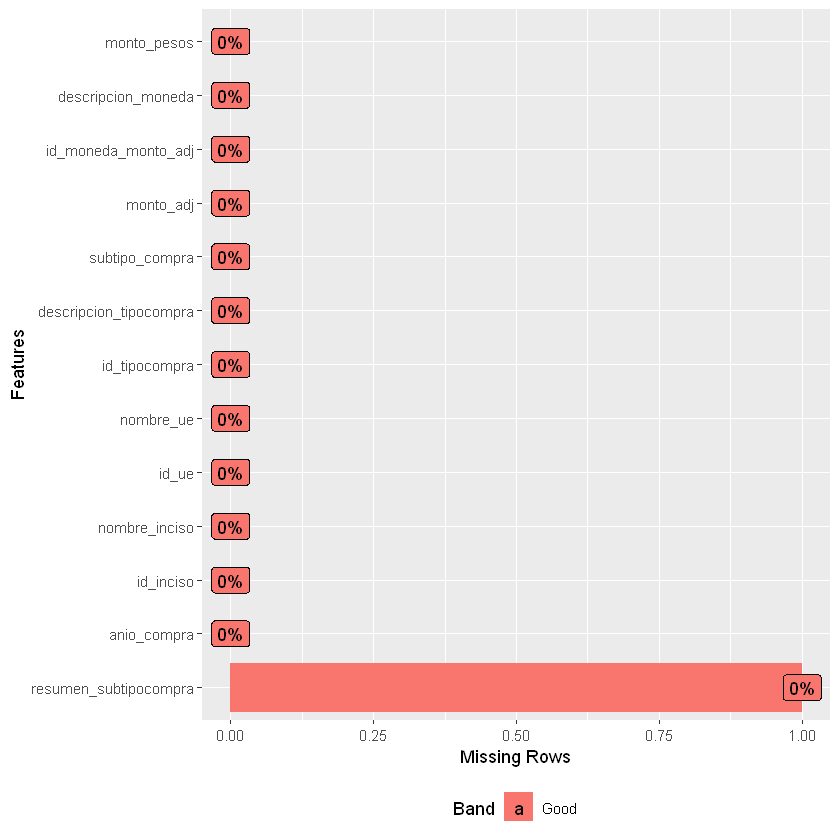

In [24]:
# Investigamos montos nulos
plot_missing(comprasEstatales)

Al observar el resultado parece ser que no existieran datos nulos o faltantes, lo cual resulta extraño. Se analizará cada variable a utilizar en el estudio de los datos.

### Identificación de valores inválidos

#### Monto Adjudicado

In [25]:
# Cantidad de valores negativos
montosNegativos <- comprasEstatales %>% select(monto_pesos) %>% 
                            filter(monto_pesos <0) %>%
                            count()
print(paste("Valores negativos: ", montosNegativos))

# Máximo y mínimo de valores negativos 
comprasEstatales %>% select(monto_pesos) %>% 
                    filter(monto_pesos <0) %>%
                    summary(monto_pesos)

[1] "Valores negativos:  19"


  monto_pesos       
 Min.   :-59404619  
 1st Qu.: -5290873  
 Median :  -240000  
 Mean   : -5527626  
 3rd Qu.:  -110000  
 Max.   :    -2000  

In [26]:
# Cantidad de valores $0
montosCero <- comprasEstatales %>% select(monto_pesos) %>% 
                            filter(monto_pesos == 0) %>%
                            count()
print(paste("Valores en cero: ", montosCero))

[1] "Valores en cero:  2108"


#### Limpieza de datos vacíos

In [27]:
# Se remplazan los datos vacíos por NA
comprasEstatales <- mutate_all(comprasEstatales, funs(na_if(.,"")))
profile_missing(comprasEstatales)

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

feature,num_missing,pct_missing
anio_compra,0,0.000000e+00
id_inciso,0,0.000000e+00
nombre_inciso,0,0.000000e+00
id_ue,0,0.000000e+00
nombre_ue,0,0.000000e+00
id_tipocompra,0,0.000000e+00
descripcion_tipocompra,0,0.000000e+00
subtipo_compra,0,0.000000e+00
resumen_subtipocompra,1,1.805934e-05
monto_adj,0,0.000000e+00


#### Análisis en variables continuas y categóricas

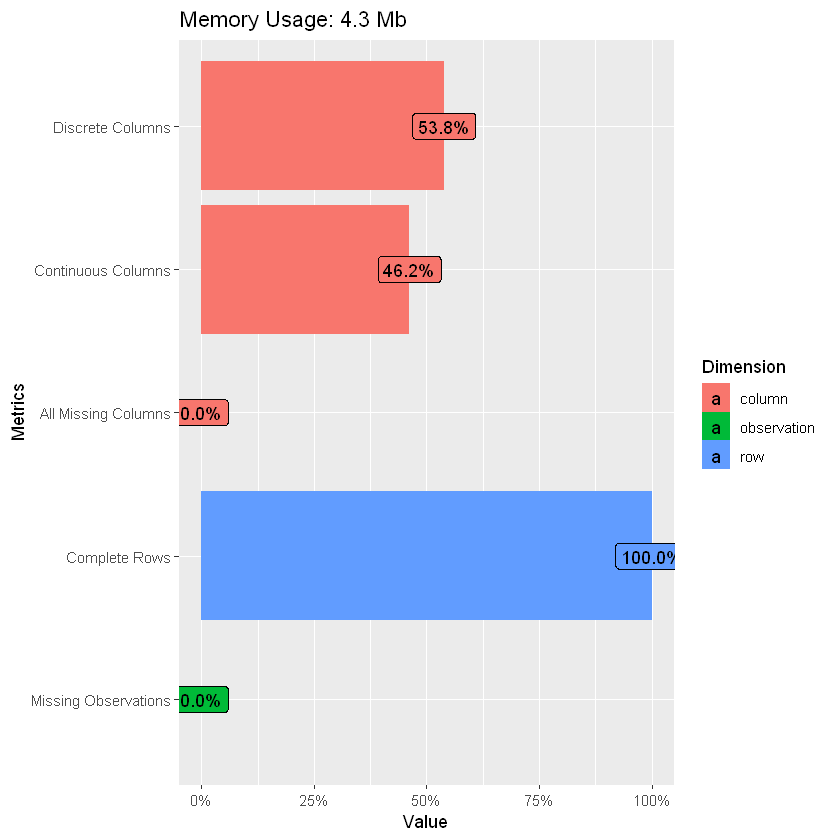

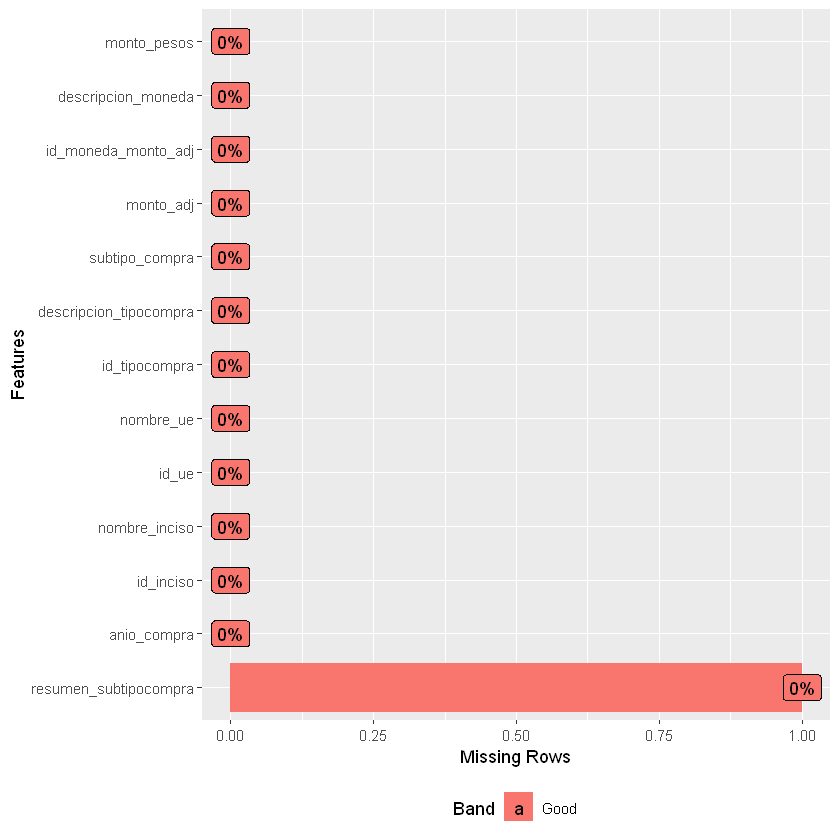

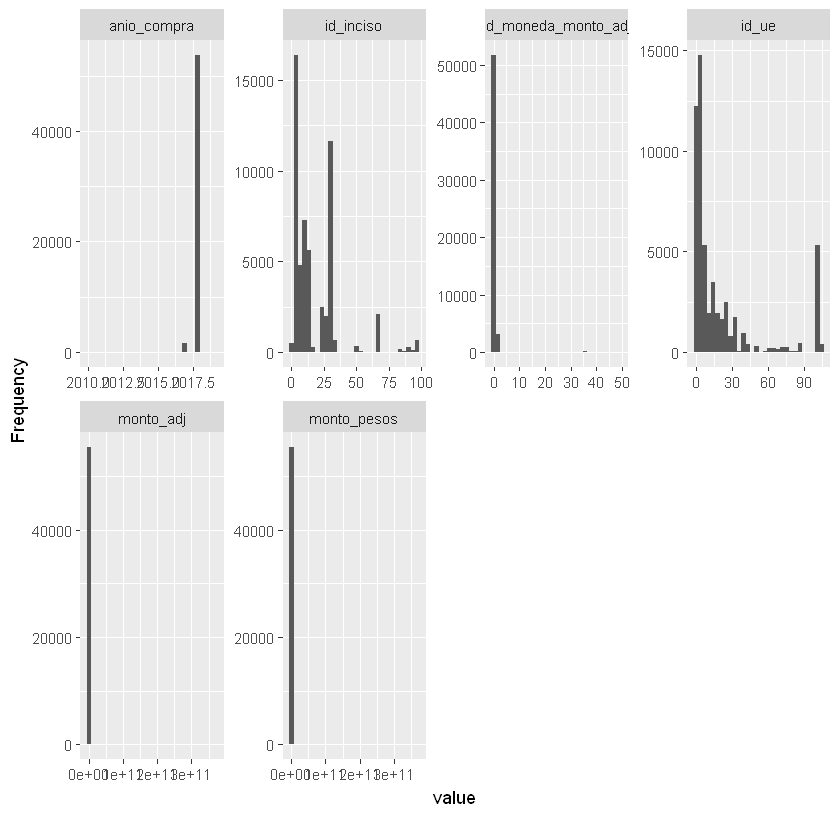

In [28]:
plot_intro(comprasEstatales)
plot_missing(comprasEstatales)
plot_histogram(comprasEstatales)

### Análisis y visualización para los requerimientos de negocio

#### TOP 20 de las organizaciones que gastaron más dinero (ordenados de forma descendente).

In [29]:
print("TOP 20 de las organizaciones que gastaron más dinero")

top20Gastos <- comprasEstatales %>% filter(!is.na(monto_pesos),monto_pesos>0)%>%
                                            group_by(Unidad_Ejecutora=nombre_ue) %>%
                                            summarise(MontoTotalGasto=sum(monto_pesos)) %>%
                                            arrange(-MontoTotalGasto)
head(top20Gastos,20)

print("TOP 20 de las organizaciones que gastaron más dinero")
summary(head(top20Gastos$MontoTotalGasto,20))

[1] "TOP 20 de las organizaciones que gastaron más dinero"


Unidad_Ejecutora,MontoTotalGasto
Consejo de Educación Técnico-Profesional,368834445057
Banco Central del Uruguay,1925604219
Dirección General de la Salud,1168828465
Secretaría del Ministerio del Interior,1072583684
Consejo Directivo Central,953021806
Presidencia de la República,840846700
Banco de la República del Uruguay,777413828
Consejo de Educación Primaria,400204805
Dirección General de Secretaría,376207189
Comando General del Ejército,358137092


[1] "TOP 20 de las organizaciones que gastaron más dinero"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.005e+08 2.453e+08 3.533e+08 1.896e+10 8.689e+08 3.688e+11 

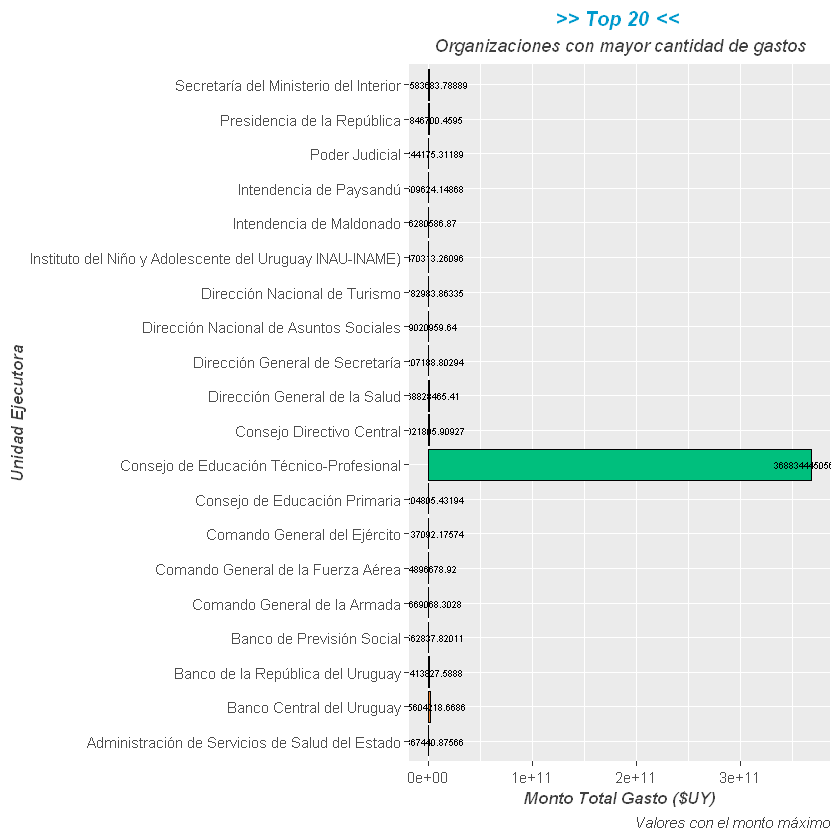

In [138]:
top20Gastos<-head(top20Gastos,20)
 ggplot(top20Gastos, aes(x = top20Gastos$Unidad_Ejecutora, y = top20Gastos$MontoTotalGasto, fill=top20Gastos$Unidad_Ejecutora)) +
  ggtitle (label=">> Top 20 << ", subtitle= "Organizaciones con mayor cantidad de gastos") +
  labs(x="Unidad Ejecutora", y="Monto Total Gasto ($UY)", caption = "Valores con el monto máximo") + 
  geom_bar(stat = "identity", color = "black") +
  geom_text(size=2,aes(hjust=0.5, label = top20Gastos$MontoTotalGasto),position = position_dodge(width=1)) + 
  coord_flip() +
  theme( axis.title=element_text(face="bold.italic", size="10", color="gray25"), legend.position="none",
         plot.title = element_text( face="bold.italic", colour="deepskyblue3", size="12", hjust = 0.5,lineheight = 1),
         plot.subtitle = element_text(color = "gray25", hjust = 0.5, face="italic"),
         plot.caption = element_text(color = "gray25", face = "italic")
       )

Debido a que el máximo de gastos se encuentra muy por encima del resto, no permite una correcta visualización en el gráfico. Por este motivo se retira dicho valor para obtener una gráfica más clara. Siempre teniendo en cuenta la unidad ejecutora que relizó más gastos.

In [31]:
print("TOP 20 de las organizaciones que gastaron más dinero")

top20GastosSinMax <- comprasEstatales %>% filter(!is.na(monto_pesos),monto_pesos>0,monto_pesos < max(monto_pesos))%>%
                                            group_by(Unidad_Ejecutora=nombre_ue) %>%
                                            summarise(MontoTotalGasto=sum(monto_pesos)) %>%
                                            arrange(-MontoTotalGasto)
head(top20GastosSinMax,20)

print("TOP 20 de las organizaciones que gastaron más dinero")
summary(head(top20GastosSinMax$MontoTotalGasto,20))

[1] "TOP 20 de las organizaciones que gastaron más dinero"


Unidad_Ejecutora,MontoTotalGasto
Banco Central del Uruguay,1925604219
Dirección General de la Salud,1168828465
Secretaría del Ministerio del Interior,1072583684
Consejo Directivo Central,953021806
Presidencia de la República,840846700
Banco de la República del Uruguay,777413828
Consejo de Educación Primaria,400204805
Dirección General de Secretaría,376207189
Comando General del Ejército,358137092
Banco de Previsión Social,348562838


[1] "TOP 20 de las organizaciones que gastaron más dinero"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.912e+08 2.334e+08 3.307e+08 5.309e+08 7.933e+08 1.926e+09 

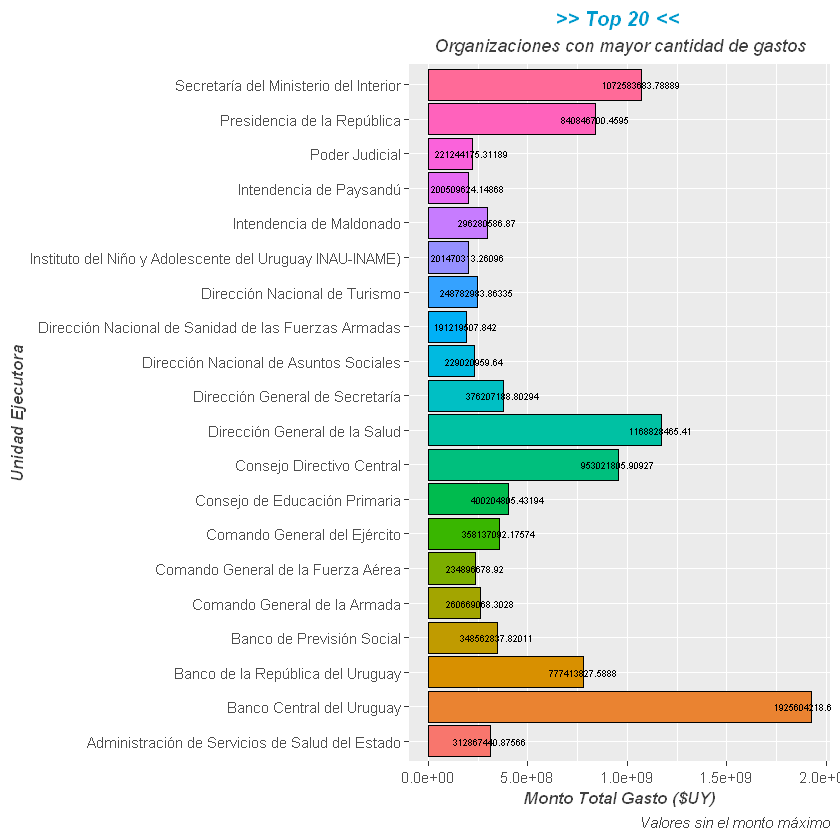

In [137]:
top20GastosSinMax<-head(top20GastosSinMax,20)
 ggplot(top20GastosSinMax, aes(x = top20GastosSinMax$Unidad_Ejecutora, y = top20GastosSinMax$MontoTotalGasto, fill=top20GastosSinMax$Unidad_Ejecutora)) +
  ggtitle (label=">> Top 20 << ", subtitle= "Organizaciones con mayor cantidad de gastos") +
  labs(x="Unidad Ejecutora", y="Monto Total Gasto ($UY)", caption = "Valores sin el monto máximo") + 
  geom_bar(stat = "identity", color = "black") +
  geom_text(size=2,aes(hjust=0.5, label = top20GastosSinMax$MontoTotalGasto),position = position_dodge(width=1)) + 
  coord_flip() +
  theme( axis.title=element_text(face="bold.italic", size="10", color="gray25"), legend.position="none",
         plot.title = element_text( face="bold.italic", colour="deepskyblue3", size="12", hjust = 0.5,lineheight = 1),
         plot.subtitle = element_text(color = "gray25", hjust = 0.5, face="italic"),
         plot.caption = element_text(color = "gray25", face = "italic")
       )




### TOP 50 de las compras más caras.

In [33]:
# No se consideran montos negativos, iguales a cero

print("TOP 50 de las compras más caras")

top50Caras <- comprasEstatales %>% select(anio_compra, nombre_inciso, nombre_ue, descripcion_tipocompra, monto_pesos) %>%
                                filter(!is.na(monto_pesos),monto_pesos>0)%>%
                                arrange(desc(monto_pesos))
head(top50Caras,50)

print("TOP 50 de las compras más caras")
summary(head(top50Caras$monto_pesos,50))

[1] "TOP 50 de las compras más caras"


anio_compra,nombre_inciso,nombre_ue,descripcion_tipocompra,monto_pesos
2018,Administración Nacional de Educación Pública,Consejo de Educación Técnico-Profesional,Compra por Excepción,368738393981
2018,Banco Central del Uruguay,Banco Central del Uruguay,Compra por Excepción,1861942473
2018,Ministerio de Salud Pública,Dirección General de la Salud,Compra por Excepción,371602714
2018,Ministerio del Interior,Secretaría del Ministerio del Interior,Licitación Pública,172385546
2018,Diversos Créditos,Presidencia de la República,Licitación Pública,159047144
2018,Diversos Créditos,Presidencia de la República,Compra por Excepción,139637540
2018,Administración de Servicios de Salud del Estado,Administración de Servicios de Salud del Estado,Licitación Pública,136878750
2017,Administración Nacional de Educación Pública,Consejo Directivo Central,Licitación Pública,104198119
2018,Administración Nacional de Educación Pública,Consejo Directivo Central,Licitación Pública,95577689
2018,Intendencia de Maldonado,Intendencia de Maldonado,Licitación Pública,92022549


[1] "TOP 50 de las compras más caras"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
3.211e+07 3.956e+07 4.468e+07 7.474e+09 6.573e+07 3.687e+11 

Debido a que el máximo de valores de compras se encuentra muy por encima del resto, no permite una correcta interpretación de los resultados. Se prosigue a dejar fuera el monto máximo.

In [141]:
# No se consideran montos negativos, iguales a cero, máximo
print("TOP 50 de las compras más caras")

top50Caras <- comprasEstatales %>% select(anio_compra, nombre_inciso, nombre_ue, descripcion_tipocompra, monto_pesos) %>%
                                filter(!is.na(monto_pesos),monto_pesos>0,monto_pesos < max(monto_pesos))%>%
                                arrange(desc(monto_pesos))
head(top50Caras,50)

print("TOP 50 de las compras más caras")
summary(head(top50Caras$monto_pesos,50))

[1] "TOP 50 de las compras más caras"


anio_compra,nombre_inciso,nombre_ue,descripcion_tipocompra,monto_pesos
2018,Banco Central del Uruguay,Banco Central del Uruguay,Compra por Excepción,1861942473
2018,Ministerio de Salud Pública,Dirección General de la Salud,Compra por Excepción,371602714
2018,Ministerio del Interior,Secretaría del Ministerio del Interior,Licitación Pública,172385546
2018,Diversos Créditos,Presidencia de la República,Licitación Pública,159047144
2018,Diversos Créditos,Presidencia de la República,Compra por Excepción,139637540
2018,Administración de Servicios de Salud del Estado,Administración de Servicios de Salud del Estado,Licitación Pública,136878750
2017,Administración Nacional de Educación Pública,Consejo Directivo Central,Licitación Pública,104198119
2018,Administración Nacional de Educación Pública,Consejo Directivo Central,Licitación Pública,95577689
2018,Intendencia de Maldonado,Intendencia de Maldonado,Licitación Pública,92022549
2018,Intendencia de Maldonado,Intendencia de Maldonado,PFI - Licitación pública internacional,88900627


[1] "TOP 50 de las compras más caras"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
3.166e+07 3.871e+07 4.447e+07 1.000e+08 6.454e+07 1.862e+09 

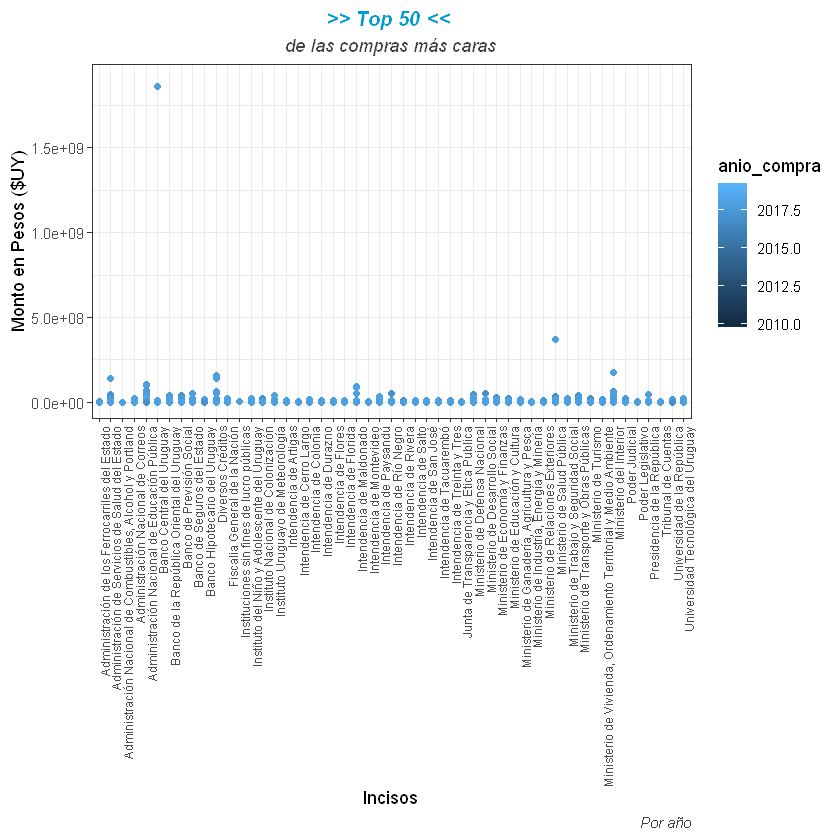

In [217]:
ggplot(top50Caras, aes(x=nombre_inciso, y=monto_pesos)) + 
geom_point(aes(col=anio_compra)) +
ggtitle (label=">> Top 50 << ", subtitle= "de las compras más caras") +
  labs(x="Incisos", y="Monto en Pesos ($UY)", caption = "Por año")+
  ylim(c(0, 1.900e+09)) +
theme(
      axis.text.x = element_text(angle = 90, hjust = 1, size="7"),
      plot.title = element_text( face="bold.italic", colour="deepskyblue3", size="12", hjust = 0.5,lineheight = 1),
      plot.subtitle = element_text(color = "gray25", hjust = 0.5, face="italic"),
      plot.caption = element_text(color = "gray25", face = "italic"))


  

#### Agregación de monto total por tipo de producto.

###### Agregar letra <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [35]:
print("Monto total por tipo de producto")

comprasEstatales %>% filter(!is.na(resumen_subtipocompra),!is.na(monto_pesos),monto_pesos>0,monto_pesos < max(monto_pesos)) %>%
                              group_by(Tipo_Producto=resumen_subtipocompra) %>%
                              summarise(MontoTotal=sum(monto_pesos), Cant_Compras=n()) %>%
                              arrange(desc(MontoTotal))

cantidadCompras <- comprasEstatales %>% filter(!is.na(resumen_subtipocompra),!is.na(monto_pesos),monto_pesos>0,monto_pesos < max(monto_pesos)) %>%
                              group_by(Tipo_Producto=resumen_subtipocompra) %>%
                              summarise(MontoTotal=sum(monto_pesos), Cant_Compras=n()) %>%
                              arrange(desc(MontoTotal)) %>%
                              count()
print(paste("Cantidad de valores tomados para Monto total por tipo de producto: ", cantidadCompras))

[1] "Monto total por tipo de producto"


Tipo_Producto,MontoTotal,Cant_Compras
Común,8489696355,50058
"Art. 33, 3: Bienes o servicios de fabricación o suministro exclusivo",4347186305,1081
Acuerdo Marco,1433469110,301
"Art. 33, 1: Contratación entre organismos o dependencias del Estado",754595136,243
"Art. 33, 20: Contratación con cooperativas sociales acreditadas ante el MIDES",422005633,157
"Art. 33, 9: Razones de urgencia no previsibles",353332113,328
"Art. 33, 7: Contratos en países extranjeros",259857569,84
"Art. 33, 2: La licitación pública, abreviada o remate resultaron desiertos",191165379,72
"Art.484, Ley 14.106-SCJ: No aplicación montos máximos del artículo 33 TOCAF",71204292,36
Opción Permuta,59666748,39


[1] "Cantidad de valores tomados para Monto total por tipo de producto:  33"


#### TOP 10 de las unidades ejecutoras que más compraron en el periodo

In [43]:
# Quedan fuera compras con monto negativo, igual a $0
print("TOP 10 de las unidades ejecutoras que más compraron por períodos")
top10Compras <- comprasEstatales %>% filter(!is.na(monto_pesos), monto_pesos > 0) %>%
                              group_by(Anio_Compra=anio_compra, Unidad_Ejecutora=nombre_ue) %>% 
                              summarise(Cantidad_Compras=n())%>% 
                              arrange(desc(Cantidad_Compras))

head(top10Compras,10)

[1] "TOP 10 de las unidades ejecutoras que más compraron por períodos"


Anio_Compra,Unidad_Ejecutora,Cantidad_Compras
2018,Dirección General de la Salud,3895
2018,Dirección General de Secretaría,2564
2018,Hospital Maciel,2376
2018,Adminstración Nacional de Correos,1979
2018,Dirección Nacional de Arquitectura,1376
2018,Dirección General de Servicios Ganaderos,1103
2018,Centro Departamental de Rocha,1057
2018,Consejo de Educación Primaria,1047
2018,Secretaría del Ministerio del Interior,920
2018,Dirección Nacional de Cultura,906


#### Compras directas mayores $436.000

In [42]:
print("Compras directas mayores $436.000")

comprasEstatales %>% select(anio_compra, id_inciso, nombre_inciso, id_ue, nombre_ue, id_tipocompra, descripcion_tipocompra,
                            subtipo_compra, resumen_subtipocompra, monto_adj, id_moneda_monto_adj, descripcion_moneda, monto_pesos) %>%
                            filter(!is.na(monto_pesos), monto_pesos > 436000, descripcion_tipocompra=="Compra Directa") %>%
                            arrange(-monto_pesos)

cantComprasMayores <- comprasEstatales %>% select(anio_compra, id_inciso, nombre_inciso, id_ue, nombre_ue, id_tipocompra, descripcion_tipocompra,
                            subtipo_compra, resumen_subtipocompra, monto_adj, id_moneda_monto_adj, descripcion_moneda, monto_pesos) %>%
                            filter(!is.na(monto_pesos), monto_pesos > 436000, descripcion_tipocompra=="Compra Directa") %>%
                            arrange(-monto_pesos) %>%
                            count()

print(paste("Cantidad de Compras Directas mayores a $436.000: ", cantComprasMayores))


[1] "Compras directas mayores $436.000"


anio_compra,id_inciso,nombre_inciso,id_ue,nombre_ue,id_tipocompra,descripcion_tipocompra,subtipo_compra,resumen_subtipocompra,monto_adj,id_moneda_monto_adj,descripcion_moneda,monto_pesos
2018,12,Ministerio de Salud Pública,1,Dirección General de Secretaría,CD,Compra Directa,COM,Común,332294.2,1,DOLAR PIZARRA VENDEDOR,12377958
2018,12,Ministerio de Salud Pública,1,Dirección General de Secretaría,CD,Compra Directa,COM,Común,11858400.0,0,PESOS URUGUAYOS,11858400
2018,12,Ministerio de Salud Pública,103,Dirección General de la Salud,CD,Compra Directa,COM,Común,8600657.6,0,PESOS URUGUAYOS,8600658
2017,2,Presidencia de la República,11,Secretaría Nacional del Deporte,CD,Compra Directa,COM,Común,5493584.0,0,PESOS URUGUAYOS,5493584
2018,12,Ministerio de Salud Pública,103,Dirección General de la Salud,CD,Compra Directa,COM,Común,4357646.5,0,PESOS URUGUAYOS,4357646
2018,12,Ministerio de Salud Pública,103,Dirección General de la Salud,CD,Compra Directa,COM,Común,3538800.0,0,PESOS URUGUAYOS,3538800
2018,12,Ministerio de Salud Pública,103,Dirección General de la Salud,CD,Compra Directa,COM,Común,3076388.3,0,PESOS URUGUAYOS,3076388
2018,12,Ministerio de Salud Pública,1,Dirección General de Secretaría,CD,Compra Directa,COM,Común,2978583.4,0,PESOS URUGUAYOS,2978583
2018,12,Ministerio de Salud Pública,103,Dirección General de la Salud,CD,Compra Directa,COM,Común,2805471.0,0,PESOS URUGUAYOS,2805471
2017,12,Ministerio de Salud Pública,103,Dirección General de la Salud,CD,Compra Directa,COM,Común,2729548.5,0,PESOS URUGUAYOS,2729549


[1] "Cantidad de Compras Directas mayores a $436.000:  450"
